#Notebook Dependencies and Imports. This Notebook should be ran on a GPU cluster on Colab.

In [ ]:
#@title Dependency Installs { run: "auto", display-mode: "form" }
%pip install transformers==4.11.3
%pip install torch==1.11.0
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install nltk
%pip install datasets
%pip install rouge_score
%pip install SentencePiece

     |████████████████████████████████| 2.9 MB 5.6 MB/s 
     |████████████████████████████████| 596 kB 16.5 MB/s 
     |████████████████████████████████| 3.3 MB 33.3 MB/s 
     |████████████████████████████████| 895 kB 27.3 MB/s 
     |████████████████████████████████| 77 kB 2.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 750.6 MB 11 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.11.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.11

In [ ]:
#@title Notebook Dependency Imports { run: "auto", display-mode: "form" }
#import transformers
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt
import seaborn
import torch
import pandas as pd
import os
import os.path
from transformers import set_seed
from transformers import T5TokenizerFast
set_seed(42)
import nltk
import json
from datasets import load_dataset
from datasets import Dataset, DatasetDict
from datasets import load_metric
from datasets import load_from_disk
from transformers import Seq2SeqTrainer
from transformers import Seq2SeqTrainingArguments
from transformers import DataCollatorForSeq2Seq
from transformers import T5Config
from transformers import AutoModelForSeq2SeqLM
from transformers import AutoTokenizer
from datasets import interleave_datasets
import time
from transformers import BertTokenizer
from statistics import mean

##Import Data From Drive

In [ ]:
#Import Necessary Files from Google Drive
#REFERENCE: https://medium.com/@acpanjan/download-google-drive-files-using-wget-3c2c025a8b99

#FORMAT: !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=FILEID" -O FILENAME && rm -rf /tmp/cookies.txt
#FILEID: 170HHx_2hoW619BsWpfpTxfwbF_p3R4sq

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=170HHx_2hoW619BsWpfpTxfwbF_p3R4sq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=170HHx_2hoW619BsWpfpTxfwbF_p3R4sq" -O base.zip && rm -rf /tmp/cookies.txt


--2022-04-07 21:41:06--  https://docs.google.com/uc?export=download&confirm=t&id=170HHx_2hoW619BsWpfpTxfwbF_p3R4sq
Resolving docs.google.com (docs.google.com)... 74.125.70.139, 74.125.70.101, 74.125.70.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.70.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d0c0ua34npvrb4086g52v83a8t08pkh7/1649367600000/08574216271669760362/*/170HHx_2hoW619BsWpfpTxfwbF_p3R4sq?e=download [following]
--2022-04-07 21:41:07--  https://doc-0c-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d0c0ua34npvrb4086g52v83a8t08pkh7/1649367600000/08574216271669760362/*/170HHx_2hoW619BsWpfpTxfwbF_p3R4sq?e=download
Resolving doc-0c-b0-docs.googleusercontent.com (doc-0c-b0-docs.googleusercontent.com)... 209.85.200.132, 2607:f8b0:4001:c16::84
Connecting to doc-0c-b0-docs.googleusercontent.com (doc-0c-b0-doc

In [ ]:
#FILEID: 1xlVpn1UApjRe20h10w7VJDprSAMpx3J2 
#FILENAME: bert
# https://drive.google.com/file/d/13xi9e1P7UGWhqwZPPDWP27JKnAE2poW8/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13xi9e1P7UGWhqwZPPDWP27JKnAE2poW8' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13xi9e1P7UGWhqwZPPDWP27JKnAE2poW8" -O bert.zip && rm -rf /tmp/cookies.txt

--2022-04-07 21:41:16--  https://docs.google.com/uc?export=download&confirm=t&id=13xi9e1P7UGWhqwZPPDWP27JKnAE2poW8
Resolving docs.google.com (docs.google.com)... 173.194.192.138, 173.194.192.102, 173.194.192.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.192.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h3e026gocb6pfbc5re8rnhmmbbdeh7b4/1649367675000/10500329572136035324/*/13xi9e1P7UGWhqwZPPDWP27JKnAE2poW8?e=download [following]
--2022-04-07 21:41:16--  https://doc-00-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h3e026gocb6pfbc5re8rnhmmbbdeh7b4/1649367675000/10500329572136035324/*/13xi9e1P7UGWhqwZPPDWP27JKnAE2poW8?e=download
Resolving doc-00-00-docs.googleusercontent.com (doc-00-00-docs.googleusercontent.com)... 209.85.200.132, 2607:f8b0:4001:c16::84
Connecting to doc-00-00-docs.googleusercontent.com (doc-0

In [ ]:
!unzip bert.zip

Archive:  bert.zip
   creating: bert_to_bert_for_demo/
  inflating: bert_to_bert_for_demo/.DS_Store  
  inflating: __MACOSX/bert_to_bert_for_demo/._.DS_Store  
   creating: bert_to_bert_for_demo/fine-tuned_model_trained_on_the_q-bio./
   creating: bert_to_bert_for_demo/fine-tuned_model_trained_on_the_cs./
  inflating: __MACOSX/bert_to_bert_for_demo/._fine-tuned_model_trained_on_the_cs.  
  inflating: bert_to_bert_for_demo/seq2seq_trainer.py  
  inflating: __MACOSX/bert_to_bert_for_demo/._seq2seq_trainer.py  
   creating: bert_to_bert_for_demo/fine-tuned_model_trained_on_the_math./
  inflating: bert_to_bert_for_demo/fine-tuned_model_trained_on_the_q-bio./optimizer.pt  
  inflating: __MACOSX/bert_to_bert_for_demo/fine-tuned_model_trained_on_the_q-bio./._optimizer.pt  
  inflating: bert_to_bert_for_demo/fine-tuned_model_trained_on_the_q-bio./config.json  
  inflating: __MACOSX/bert_to_bert_for_demo/fine-tuned_model_trained_on_the_q-bio./._config.json  
  inflating: bert_to_bert_for_demo/f

In [ ]:
#Unzip imported file
!unzip base.zip


Archive:  base.zip
   creating: nlp_coursework_20220405/
   creating: nlp_coursework_20220405/base_models_trained/
   creating: nlp_coursework_20220405/base_models_trained/10_epochs_pretrained_t5_trained_on_cs._model/
  inflating: nlp_coursework_20220405/base_models_trained/10_epochs_pretrained_t5_trained_on_cs._model/config.json  
  inflating: nlp_coursework_20220405/base_models_trained/10_epochs_pretrained_t5_trained_on_cs._model/pytorch_model.bin  
  inflating: nlp_coursework_20220405/base_models_trained/10_epochs_pretrained_t5_trained_on_cs._model/special_tokens_map.json  
  inflating: nlp_coursework_20220405/base_models_trained/10_epochs_pretrained_t5_trained_on_cs._model/spiece.model  
  inflating: nlp_coursework_20220405/base_models_trained/10_epochs_pretrained_t5_trained_on_cs._model/tokenizer.json  
  inflating: nlp_coursework_20220405/base_models_trained/10_epochs_pretrained_t5_trained_on_cs._model/tokenizer_config.json  
   creating: nlp_coursework_20220405/base_models_train

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3550344402200988217
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14606863436643768805
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

# Study Overview

The goal of this study is to analyze domain shift/generalization ability in deep learning and analyze ways to mitigate the issue of domain shift in order to increase generalization ability of Deep Learning Models. In this analysis, we seek to answer the following research questions:

1. Does the task of title generation from a research paper abstract differ amongst categories (https://arxiv.org/category_taxonomy)? Does domain shift exist here?

2. How can we mitigate domain shift issues when generating titles from abstracts from differing domains? That is, if we train a model on Computer Science Abstract/Title pairs, how does this generalize to out of domain Abstract/title Pairs (e.g. Mathematics)?

3. Can the BERT pretrained model outperform a joint training strategy? That is, a pre-trained BERT model further trained on a single category vs. a joint training strategy trained on all domains. 




## Models

###**Base Model**: T5 Transformer Model - No Pretraining

The T5 Model is a a Text To Text encoder-decoder Transformer model. This model is utilized without pretraining. This is to allow for apples to apples comparison with the BERT Model (Trasformer compared to Transformer). 

###**BERT Model**: BERT Transformer Model - Pretrained Model

##Data Overview

10000 training samples are taken from the CS, Math, and Quantitative Bio categories of the Arxiv Dataset and are split into training (80%), validation(10%), and test (10%) sets. The labels are the paper titles and the references are the abstracts. 

### Load and Process the Data

In [ ]:
base_tokenizer = T5TokenizerFast.from_pretrained('t5-large')

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

###Base Model Helper Functions

In [ ]:
#Load all Helper Functions
def get_all_papers_base(dataframe_file_path):
  print("getting all papers...")
  #Contains all ariticles from the dataset
  filepath = 'arxiv-metadata-oai-snapshot.json'

  df_chunk = pd.read_json(filepath, lines = True, chunksize = 50000)

  '''
  id: ArXiv ID (can be used to access the paper, see below)
  submitter: Who submitted the paper
  authors: Authors of the paper
  title: Title of the paper
  comments: Additional info, such as number of pages and figures
  journal-ref: Information about the journal the paper was published in
  doi: [https://www.doi.org](Digital Object Identifier)
  abstract: The abstract of the paper
  categories: Categories / tags in the ArXiv system
  versions: A version history
  '''
  related_categories = ['id','title','categories','abstract','update_date']

  df = pd.DataFrame()

  for item in df_chunk:
    temp = item[related_categories]
    df = pd.concat([df, temp], ignore_index=True)

  df.to_csv(dataframe_file_path)

  return df


def load_dataset_base(dataset_file_path, pandas_dataframe_file_path, category=None):
    """
    Load dataset.

    Args:
        dataset_file_path (_type_): file path for dataset
        pandas_dataframe_file_path: file path for pandas dataframe

    Returns:
        dataset (Dataset): Hugginface Dataset loaded from dataframe
    """  
    if os.path.exists(dataset_file_path):
        train_valid_test_dataset = load_from_disk(dataset_file_path)
    else:
        # Data Preprocessing
        if os.path.exists(pandas_dataframe_file_path):
            all_papers = pd.read_csv(pandas_dataframe_file_path)
        else:
            all_papers = get_all_papers_base(pandas_dataframe_file_path)
        papers = get_paper_by_category(all_papers, category)
        # papers.to_csv('nlp.csv')

        dataset = Dataset.from_pandas(papers[["abstract", "title"]])

        # 80% train, 20% test + validation
        train_test_dataset = dataset.train_test_split(test_size=0.2, seed=42)
        
        # # Split the 80% train into 60% train, 20% valid
        # train_valid_dataset = train_test_dataset['train'].train_test_split(test_size=0.2, seed=42)

        #split the 20% test into 50% validation adn 50% test (10% of total dataset each)
        val_test_dataset = train_test_dataset['test'].train_test_split(test_size=0.5, seed=42)

        # gather everyone if you want to have a single DatasetDict
        train_valid_test_dataset = DatasetDict({
            'train': train_test_dataset['train'],
            'test': val_test_dataset['train'],
            'valid': val_test_dataset['test']})
        train_valid_test_dataset.save_to_disk(dataset_file_path)
    return train_valid_test_dataset

#REFERENCE: https://huggingface.co/docs/transformers/master/en/tasks/summarization
def get_inputs_and_labels_base(papers):
    """ takes in a dataframe of papers and returns the labels (titles) and inputs (abstracts) tokenized

    """
    inputs = ["summarize: " + doc for doc in papers["abstract"]]
    model_inputs = base_tokenizer(inputs, max_length = 512, padding = True, truncation=True)

    with base_tokenizer.as_target_tokenizer():
        labels = base_tokenizer(papers["title"], max_length = 20, padding = True, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    # because BERT automatically shifts the labels, the labels correspond exactly to `decoder_input_ids`. 
    # We have to make sure that the PAD token is ignored

    model_inputs["labels"] = [[-100 if token == base_tokenizer.pad_token_id else token for token in labels] for labels in model_inputs["labels"]] 
    return model_inputs

def tokenize_ds_base(ds):
 
    tokenized_ds = ds.map(get_inputs_and_labels_base, batched = True)
    return tokenized_ds, base_tokenizer
  

def generate_title_base(batch, model):
    # Tokenizer will automatically set [BOS] <text> [EOS]
    # cut off at BERT max length 512
    output_sequences = model.generate(
                input_ids=torch.from_numpy(np.array(batch['input_ids'])).to('cuda'),
                attention_mask=torch.from_numpy(np.array(batch['attention_mask'])).to('cuda'),
                do_sample=True,  # disable sampling to test if batching affects output
                num_beams = 5,
                early_stopping = True,
                no_repeat_ngram_size = 2
            )
    predictions = tokenizer.batch_decode(output_sequences, skip_special_tokens=True)

    batch["pred"] = predictions

    return batch



In [ ]:
dataframe_file_path = './df.csv'
cats = ['cs.', 'q-bio.', 'math.'] 
cats_to_file_path = {'cs.': "./nlp_coursework_20220405/cs_dataset", 'q-bio.': "./nlp_coursework_20220405/q-bio_dataset", 'math.': "./nlp_coursework_20220405/math_dataset"}

#get all the datasets
train_val_test_ds_dict = {}
for cat in cats:
    #Start preprocessing (tokenization, batching datasets into tensorflow dataset)
    print("Start loading data")
    #tok_ds, data_collator = data_preprocessing_by_category(all_papers, model, cat)
    #pass
    ds = load_dataset_base(cats_to_file_path[cat], dataframe_file_path, cat)

    print("tokenize data...")
    tok_ds, tokenizer = tokenize_ds_base(ds)
    


    #Create a dictionary element for this category where the value is a tuple (train, val, test) of tokenized datasets
    train_val_test_ds_dict[cat] = ((tok_ds['train'], tok_ds['valid'], tok_ds['test']))
    

Start loading data
tokenize data...


  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Start loading data
tokenize data...


  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Start loading data
tokenize data...


  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

##Ground Truth Examples


In [ ]:
#@title Ground Truth Examples
cs_ground_truth = train_val_test_ds_dict['cs.'][2].select(range(1))
qbio_ground_truth = train_val_test_ds_dict['q-bio.'][2].select(range(1))
math_ground_truth = train_val_test_ds_dict['math.'][2].select(range(1))

cs_ground_truth_abstract = cs_ground_truth['abstract'][0]
print("cs_ground_truth_abstract:\n", cs_ground_truth_abstract)
cs_ground_truth_title = cs_ground_truth['title'][0]
print("cs_ground_truth_title:\n", cs_ground_truth_title, "\n")

qbio_ground_truth_abstract = qbio_ground_truth['abstract'][0]
print("qbio_ground_truth_abstract:\n", qbio_ground_truth_abstract)
qbio_ground_truth_title = qbio_ground_truth['title'][0]
print("qbio_ground_truth_title:\n", qbio_ground_truth_title, "\n")


math_ground_truth_abstract = math_ground_truth['abstract'][0]
print("math_ground_truth_abstract:\n", math_ground_truth_abstract)
math_ground_truth_title = math_ground_truth['title'][0]
print("math_ground_truth_title:\n", math_ground_truth_title, "\n")

cs_ground_truth_abstract:
   We compute a \emph{sparse} solution to the classical least-squares problem
$\min_x||A x -b||,$ where $A$ is an arbitrary matrix. We describe a novel
algorithm for this sparse least-squares problem. The algorithm operates as
follows: first, it selects columns from $A$, and then solves a least-squares
problem only with the selected columns. The column selection algorithm that we
use is known to perform well for the well studied column subset selection
problem. The contribution of this article is to show that it gives favorable
results for sparse least-squares as well. Specifically, we prove that the
solution vector obtained by our algorithm is close to the solution vector
obtained via what is known as the "SVD-truncated regularization approach".

cs_ground_truth_title:
 A note on sparse least-squares regression 

qbio_ground_truth_abstract:
   The bacterium Group A Streptococcus (Streptococcus pyogenes, GAS) is a
human-specific pathogen and a major cause of g

#Proof Of Concept (POC)

##Pretrained T5 POC Experiment Setup

We take 30 Examples (10 of each category), interleave them, and train/validate/test on a 80/10/10 split. Training is done for 30 epochs on the 24 training abstract/title pairs. A Pretrained T5 is utilized for this proof of concept. 


###Pretrained T5 POC Experiment Setup

####Load POC Model

In [ ]:
epochs = 30
#Load Pretrained Model
poc_t5_model = AutoModelForSeq2SeqLM.from_pretrained("./nlp_coursework_20220405/base_models_trained/30_epochs_pretrained_t5_trained_on_jointdata_model_poc/")
#poc_t5_model = AutoModelForSeq2SeqLM.from_config(poc_t5_model)
poc_t5_model.to('cuda')
poc_tokenizer = AutoTokenizer.from_pretrained("./nlp_coursework_20220405/base_models_trained/30_epochs_pretrained_t5_trained_on_jointdata_model_poc/")



####POC Code Prerequisites

In [ ]:
def get_all_papers_poc(dataframe_file_path):
  print("getting all papers...")
  #Contains all ariticles from the dataset
  filepath = 'arxiv-metadata-oai-snapshot.json'

  df_chunk = pd.read_json(filepath, lines = True, chunksize = 50000)

  '''
  id: ArXiv ID (can be used to access the paper, see below)
  submitter: Who submitted the paper
  authors: Authors of the paper
  title: Title of the paper
  comments: Additional info, such as number of pages and figures
  journal-ref: Information about the journal the paper was published in
  doi: [https://www.doi.org](Digital Object Identifier)
  abstract: The abstract of the paper
  categories: Categories / tags in the ArXiv system
  versions: A version history
  '''
  related_categories = ['id','title','categories','abstract','update_date']

  df = pd.DataFrame()

  for item in df_chunk:
    temp = item[related_categories]
    df = pd.concat([df, temp], ignore_index=True)

  df.to_csv(dataframe_file_path)

  return df

def get_paper_by_category_poc(all_papers, category = None):
  """Get papers df as a dataset. If category provided, only retrieve category of that type.

  Args:
      all_papers (_type_): _description_
      category (_type_, optional): _description_. Defaults to None.

  Returns:
      pandas dataframe: _description_
  """  
  #break into category

  #if no category return dataset of all papers
  if category == None:
    print("getting papers by category...")
    #subsample 10K
    all_papers = all_papers.sample(30000, random_state=42)
    return all_papers#Dataset.from_pandas(all_papers)
  else:
    print("getting papers by category "+category+"...")
    papers_for_one_category = all_papers[(all_papers['categories'].str.startswith(category) == True) | (all_papers['categories'].str.contains(' '+category) == True)].reset_index(drop=True)

    papers_for_one_category = papers_for_one_category.sample(10000, random_state=42)
    
    papers_for_one_category.drop(labels = ['id', 'update_date'], axis = 1, inplace = True)

    # papers_for_one_category.to_csv(cats_to_file_path[category])

    #create huggingface dataset
    # papers_for_one_category_ds = Dataset.from_pandas(papers_for_one_category)

    return papers_for_one_category

def load_dataset_poc(dataset_file_path, pandas_dataframe_file_path, category=None):
    """
    Load dataset.

    Args:
        dataset_file_path (_type_): file path for dataset
        pandas_dataframe_file_path: file path for pandas dataframe

    Returns:
        dataset (Dataset): Hugginface Dataset loaded from dataframe
    """  
    if os.path.exists(dataset_file_path):
        train_valid_test_dataset = load_from_disk(dataset_file_path)
    else:
        # Data Preprocessing
        if os.path.exists(pandas_dataframe_file_path):
            all_papers = pd.read_csv(pandas_dataframe_file_path)
        else:
            all_papers = get_all_papers(pandas_dataframe_file_path)
        papers = get_paper_by_category_poc(all_papers, category)
        # papers.to_csv('nlp.csv')

        dataset = Dataset.from_pandas(papers[["abstract", "title"]])

        # 80% train, 20% test + validation
        train_test_dataset = dataset.train_test_split(test_size=0.2, seed=42)
        
        # # Split the 80% train into 60% train, 20% valid
        # train_valid_dataset = train_test_dataset['train'].train_test_split(test_size=0.2, seed=42)

        #split the 20% test into 50% validation adn 50% test (10% of total dataset each)
        val_test_dataset = train_test_dataset['test'].train_test_split(test_size=0.5, seed=42)

        # gather everyone if you want to have a single DatasetDict
        train_valid_test_dataset = DatasetDict({
            'train': train_test_dataset['train'],
            'test': val_test_dataset['train'],
            'valid': val_test_dataset['test']})
        train_valid_test_dataset.save_to_disk(dataset_file_path)
    return train_valid_test_dataset



def get_ds_train_test_split_poc(ds, test_size = 0.2):
  """Create the train_test_split for a dataset (80, 20)

  Args:
      ds (_type_): _description_
      test_size (float, optional): _description_. Defaults to 0.2.

  Returns:
      _type_: _description_
  """  
  return ds.train_test_split(test_size = test_size)


#REFERENCE: https://huggingface.co/docs/transformers/master/en/tasks/summarization
def get_inputs_and_labels_poc(papers):
    """ takes in a dataframe of papers and returns the labels (titles) and inputs (abstracts) tokenized

    """
    inputs = ["summarize: " + doc for doc in papers["abstract"]]
    model_inputs = poc_tokenizer(inputs, max_length = 512, padding = True, truncation=True)

    with poc_tokenizer.as_target_tokenizer():
        labels = poc_tokenizer(papers["title"], max_length = 20, padding = True, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    # because BERT automatically shifts the labels, the labels correspond exactly to `decoder_input_ids`. 
    # We have to make sure that the PAD token is ignored

    model_inputs["labels"] = [[-100 if token == poc_tokenizer.pad_token_id else token for token in labels] for labels in model_inputs["labels"]] #todo:ets
    return model_inputs

def tokenize_ds_poc(ds):
 
    tokenized_ds = ds.map(get_inputs_and_labels_poc, batched = True)
    return tokenized_ds, poc_tokenizer



def paper_pipeline_poc(all_papers, model, category = None):
    print("Starting getting papers for category...")
    ds = get_paper_by_category_poc(all_papers, category)

    print("Starting getting train_test_split...")
    ds = get_ds_train_test_split_poc(ds, test_size = 0.2)
    
    print("Starting tokenization...")
    ds, poc_tokenizer = tokenize_ds_poc(ds)

    return  ds, poc_tokenizer



def data_preprocessing_by_category_poc(all_papers, model, category = None):

  print("Staring paper pipeline...")
  tok_ds, poc_tokenizer = paper_pipeline_poc(all_papers, model, category)
  print("Paper pipeline finished.")

  print("Collating data...")

  data_collator = DataCollatorForSeq2Seq(tokenizer=poc_tokenizer
    , model=model
    , return_tensors='pt'
    , label_pad_token_id = -100
    ) 

  return tok_ds, data_collator

### CREATE THE MODEL ARCHITECTURE

#REFERENCE: https://huggingface.co/docs/transformers/create_a_model
#T5 (https://huggingface.co/docs/transformers/master/en/model_doc/t5#transformers.T5ForConditionalGeneration) for language modelling is utilized for language modeling tasks such as Text Summarization. By importing 
# this library, a different model head (output layer) is utilzied which fits the particular task at hand (Text Summarization)
def create_base_model_poc():
        
    #config = T5Config()
    #config.decoder_start_token_id = config.pad_token_id #REFERENCE: https://huggingface.co/docs/transformers/v4.17.0/en/model_doc/t5#transformers.TFT5ForConditionalGeneration


    #print(config)
    model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")



    #Save the model, this saves the UNTRAINED model which we just created above.
    #config.save_pretrained(save_directory="./base_model")

    #This creates a model with random values instead of pretrained weights. 
    #We won’t be able to use this model for anything useful yet until we train it. 
    #Load untrained model
    #model = AutoModelForSeq2SeqLM.from_config(config) #This automatically used the TFT5ForConditionalGeneration model. #model2 = TFT5ForConditionalGeneration.from_config('t5-small')

    return model



####MODEL FITTING & EVALUATION UTILS
def fit_model_poc(model, train_set, test_set, epochs, data_collator):
    metric = load_metric('rouge')

   

    #Specify where to save the checkpoints from your training
    #REFERENCE: https://huggingface.co/docs/transformers/main/en/tasks/summarization
    training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=3e-4,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=epochs,
    fp16=True,
    save_strategy='epoch', #save is done at the end of each epoch
    seed=42 #needed for reproducibiltiy
    )

    trainer = Seq2SeqTrainer(
        model=model,
        args=training_args,
        train_dataset=train_set,
        eval_dataset=test_set,
        tokenizer=poc_tokenizer,
        data_collator=data_collator
    )



    print("Training Starting...")
    train_start_time = time.time()
    trainer.train()
    train_end_time = time.time()

    #HOW TO SAVE A MODEL: https://huggingface.co/docs/transformers/main/en/quicktour#save-a-model
    #save_directory = "./tf_saved_test_trained_100_epochs_astro_ph" #TODO: UPDATE BEFORE RUNNING TO NOT OVERWRITE
    #model2.save_pretrained(save_directory)
  

    print("Training finished in ", train_end_time - train_start_time)
    return model, trainer


# map data correctly
def generate_title_poc(batch, model):
    # Tokenizer will automatically set [BOS] <text> [EOS]
    # cut off at BERT max length 512
    output_sequences = model.generate(
                input_ids=torch.from_numpy(np.array(batch['input_ids'])).to('cuda'),
                attention_mask=torch.from_numpy(np.array(batch['attention_mask'])).to('cuda'),
                do_sample=True,  
                num_beams = 5,
                early_stopping = True,
                no_repeat_ngram_size = 2
            )
    predictions = poc_tokenizer.batch_decode(output_sequences, skip_special_tokens=True)

    batch["pred"] = predictions

    return batch

#####Gather Data for POC

In [ ]:
#Get Data
###DECLARE VARIABLES
dataframe_file_path = './df.csv'
cats = ['cs.', 'q-bio.', 'math.'] 
cats_to_file_path = {'cs.': "./nlp_coursework_20220405/cs_dataset", 'q-bio.': "./nlp_coursework_20220405/q-bio_dataset", 'math.': "./nlp_coursework_20220405/math_dataset"}

#get all the papers from the archive dataset in a pandas dataframe.
print("Start Getting all papers...")
#all_papers = get_all_papers()
print(cats_to_file_path)
#get all the datasets
train_val_test_ds_dict_poc = {}
for cat in cats:
    #Start preprocessing (tokenization, batching datasets into tensorflow dataset)
    print("Start loading data")
    #tok_ds, data_collator = data_preprocessing_by_category(all_papers, model, cat)
    #pass
    ds_poc = load_dataset_poc(cats_to_file_path[cat], dataframe_file_path, cat)

    print("tokenize data...")
    tok_ds_poc, poc_tokenizer = tokenize_ds_poc(ds)
    


    #Create a dictionary element for this category where the value is a tuple (train, val, test) of tokenized datasets
    train_val_test_ds_dict_poc[cat] = ((tok_ds_poc['train'].select(range(8)), tok_ds_poc['valid'].select(range(1)), tok_ds_poc['test'].select(range(1))))
  
#Combine Data
#Combine Train Data
cat1_train = train_val_test_ds_dict_poc[cats[0]][0]
cat2_train = train_val_test_ds_dict_poc[cats[1]][0]
cat3_train = train_val_test_ds_dict_poc[cats[2]][0]
train_data_poc = interleave_datasets([cat1_train, cat2_train, cat3_train])
train_data_poc = train_data_poc.select(range(24))
#Combine Validation Data
cat1_valid = train_val_test_ds_dict_poc[cats[0]][1]
cat2_valid = train_val_test_ds_dict_poc[cats[1]][1]
cat3_valid = train_val_test_ds_dict_poc[cats[2]][1]
valid_data_poc = interleave_datasets([cat1_valid, cat2_valid, cat3_valid])
valid_data_poc = valid_data_poc.select(range(3))
#Combine Test Data
cat1_test = train_val_test_ds_dict_poc[cats[0]][2]
cat2_test = train_val_test_ds_dict_poc[cats[1]][2]
cat3_test = train_val_test_ds_dict_poc[cats[2]][2]
test_data_poc = interleave_datasets([cat1_test, cat2_test, cat3_test])
test_data_poc = test_data_poc.select(range(3))

Start Getting all papers...
{'cs.': './nlp_coursework_20220405/cs_dataset', 'q-bio.': './nlp_coursework_20220405/q-bio_dataset', 'math.': './nlp_coursework_20220405/math_dataset'}
Start loading data
tokenize data...


  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Start loading data
tokenize data...


  0%|          | 0/8 [00:00<?, ?ba/s]

Loading cached processed dataset at nlp_coursework_20220405/math_dataset/test/cache-0c9cd14e2586ed07.arrow
Loading cached processed dataset at nlp_coursework_20220405/math_dataset/valid/cache-562cf89d82cb6a91.arrow
Loading cached processed dataset at nlp_coursework_20220405/math_dataset/train/cache-31b621d8ac2a9f90.arrow
Loading cached processed dataset at nlp_coursework_20220405/math_dataset/test/cache-0c9cd14e2586ed07.arrow
Loading cached processed dataset at nlp_coursework_20220405/math_dataset/valid/cache-562cf89d82cb6a91.arrow


Start loading data
tokenize data...


#####Evaluate POC Model


In [ ]:
#@title Default title text
##Evaluate the cs Model
data_collator = DataCollatorForSeq2Seq(tokenizer=poc_tokenizer
    , model=poc_t5_model 
    , return_tensors='pt'
    , label_pad_token_id = -100
  ) 


category_trained_on = 'joint_pretrained_t5_24_examples' 
#print(train_val_test_ds_dict.keys())
for category_evaluated_on, (train, val, test) in train_val_test_ds_dict_poc.items():
    rouge_metric = load_metric('rouge')

    ##INFERENCE
    #Needed due to inference in T5 Model, see docs
    poc_tokenizer.padding_side = "left"
    poc_tokenizer.pad_token = poc_tokenizer.eos_token  

    #Batch Generate Predictions
    predictions = test.map(lambda x: generate_title_poc(x, poc_t5_model), batched=True, batch_size=64) 
    #Get the references
    references = test['title']

    #compute the metrics on the test set
    results = rouge_metric.compute(predictions=predictions, references=references) 
    print("Rouge1 Fmeasure for model trained on category", category_trained_on, "evaluated on", category_evaluated_on, "are:")
    print(results['rouge1'].mid.fmeasure)
    #write metric results to a file
    #output_filename = str(10) + '_epochs_trained_on_' + category_trained_on + '_evaluated_on_' + category_evaluated_on + '.txt'
    #with open(output_filename, 'w') as file:
    #    file.write(str(results))

    # print(store_rouge1_mid_fmeasure("base", category_trained_on, category_evaluated_on, results))

  0%|          | 0/1 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


Rouge1 Fmeasure for model trained on category joint_pretrained_t5_24_examples evaluated on cs. are:
0.008285004142502071


Loading cached processed dataset at nlp_coursework_20220405/math_dataset/test/cache-1f1f780b92f39635.arrow


Rouge1 Fmeasure for model trained on category joint_pretrained_t5_24_examples evaluated on q-bio. are:
0.008285004142502071


Loading cached processed dataset at nlp_coursework_20220405/math_dataset/test/cache-1f1f780b92f39635.arrow


Rouge1 Fmeasure for model trained on category joint_pretrained_t5_24_examples evaluated on math. are:
0.008285004142502071


### POC Evaluation Demo

In [ ]:
#@title Generating Title on Example from Training Data { vertical-output: true }
#Batch Generate Predictions
predictions_train = train_data_poc.map(lambda x: generate_title_poc(x, poc_t5_model), batched=True, batch_size=8) 
#Get the references
print("Ground Truth Abstract:", '\n')
print(train_data_poc['abstract'][1])
print('Ground Truth Title:', '\n')
print(train_data_poc['title'][1], '\n')
print("Predicted Title:", '\n')
print(predictions_train['pred'][1], '\n')
print("Rouge1 Score For This Example")
rouge_metric.compute(predictions = [predictions_train['pred'][1]], references = [train_data_poc['title'][1]])['rouge1'].mid.fmeasure 


  0%|          | 0/3 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


Ground Truth Abstract: 

  A new network evolution model is introduced in this paper. The model is based
on co-operations of $N$ units. The units are the nodes of the network and the
co-operations are indicated by directed links. At each evolution step $N$ units
co-operate which formally means that they form a directed $N$-star subgraph. At
each step either a new unit joins to the network and it co-operates with $N-1$
old units or $N$ old units co-operate. During the evolution both preferential
attachment and uniform choice are applied. Asymptotic power law distributions
are obtained both for the in-degrees and the out-degrees.

Ground Truth Title: 

The $N$-stars network evolution model 

Predicted Title: 

The $N$-star network evolution model 

Rouge1 Score For This Example


0.8333333333333334

In [ ]:
#@title Generating Title on Example from Validation Data { vertical-output: true }
#Batch Generate Predictions
predictions_valid = valid_data_poc.map(lambda x: generate_title_poc(x, poc_t5_model), batched=True, batch_size=8) 
#Get the references
print("Ground Truth Abstract:", '\n')
print(valid_data_poc['abstract'][1])
print('Ground Truth Title:', '\n')
print(valid_data_poc['title'][1], '\n')
print("Predicted Title:", '\n')
print(predictions_valid['pred'][1], '\n')
print("Rouge1 Score For This Example")
rouge_metric.compute(predictions = [predictions_valid['pred'][1]], references = [valid_data_poc['title'][1]])['rouge1'].mid.fmeasure

  0%|          | 0/1 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


Ground Truth Abstract: 

  We describe the implementation of a second-order accurate volume-of-fluid
interface tracking algorithm in the open source finite element code ASPECT,
which is designed to model convection in the Earth's mantle. This involves the
solution of the incompressible Stokes equations coupled to an advection
diffusion equation for the temperature, a Boussinesq approximation that governs
the dependence of the density on the temperature, and an advection equation for
a marker indicating the two initial density states. The volume-of-fluid method
is fully parallelized and is integrated with the adaptive mesh refinement
algorithm in ASPECT. We present the results of several standard interface
tracking benchmarks in order to demonstrate the accuracy of the method as well
as the results of several benchmarks commonly used in the computational mantle
convection community. Finally, we present the results of computations with and
without adaptive mesh refinement of a model prob

0.43243243243243246

In [ ]:
#@title Generating Title on Example from Test Data { vertical-output: true }
#Batch Generate Predictions
predictions_test = test_data_poc.map(lambda x: generate_title_poc(x, poc_t5_model), batched=True, batch_size=8) 
#Get the references
print("Ground Truth Abstract:", '\n')
print(test_data_poc['abstract'][1])
print('Ground Truth Title:', '\n')
print(test_data_poc['title'][1], '\n')
print("Predicted Title:", '\n')
print(predictions_test['pred'][1], '\n')
print("Rouge1 Score For This Example")
rouge_metric.compute(predictions = [predictions_test['pred'][1]], references = [test_data_poc['title'][1]])['rouge1'].mid.fmeasure 

  0%|          | 0/1 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


Ground Truth Abstract: 

  We consider in this paper the semiparametric mixture of two distributions
equal up to a shift parameter. The model is said to be semiparametric in the
sense that the mixed distribution is not supposed to belong to a parametric
family. In order to insure the identifiability of the model it is assumed that
the mixed distribution is symmetric, the model being then defined by the mixing
proportion, two location parameters, and the probability density function of
the mixed distribution. We propose a new class of M-estimators of these
parameters based on a Fourier approach, and prove that they are square root
consistent under mild regularity conditions. Their finite-sample properties are
illustrated by a Monte Carlo study and a benchmark real dataset is also studied
with our method.

Ground Truth Title: 

Semiparametric mixtures of symmetric distributions 

Predicted Title: 

Semiparametric mixture of two distributions equal to a shift parameter 

Rouge1 Score For 

0.4

**From the above Examples utilizing a pretrained T5 model, it is clear that the setup utilized is learning and the pipeline has been set up appropriately. Therefore we continue with our experiments.**

#Main Experiments

Each Experiment is trained for 10 epochs with 8000 Training examples with a batch size of 16. The models when evaluated are evaluated on the 1000 holdout test sets of the relevant category. The models are evaluated utilizing the Rouge metric.

##Setup

In [ ]:
# variables and a function needed to store results to show later
base_model_f_scores = []
bert2bert_model_f_scores = []

in_domain_results = {"base": [], "bert": []}
out_domain_results = {"base": [], "joint": [], "bert": []}

def store_rouge1_mid_fmeasure(which_model, category_trained_on, category_evaluated_on, results):
  result = results["rouge1"].mid.fmeasure # .round(result, 4)
  
  if which_model == "joint" or category_trained_on != category_evaluated_on: # our of domain
    out_domain_results[which_model].append(result)
  else: # in domain
    in_domain_results[which_model].append(result)


##Experiment #1: Base Model

The first experiment utilizes the base model in order to address Research Question 1. This experiment serves to test the hypothesis that each of the chosen categories are their own domain. In order to test this, we train the base model from scratch (without pretraining) on each of the three categories and evaluated on each of the three categories. The model is reset in between training runs. For example, we train the model on Computer Science Abstract/Title pairs and evaluate the  model on Computer Science Abstract/Title Pairs, Mathematics Abstract/Title Pairs, and Quantitative Biology Abstract/Title Pairs.

###Load Models


In [ ]:
##Load the Trained Models

#Load Trained on Computer Science
exp_1_cs_model = AutoModelForSeq2SeqLM.from_pretrained("./nlp_coursework_20220405/base_models_trained/10_epochs_trained_on_cs._model/")
exp_1_cs_model_tokenizer = AutoTokenizer.from_pretrained("./nlp_coursework_20220405/base_models_trained/10_epochs_trained_on_cs._model/")
exp_1_cs_model.to('cuda')

#Load Trained on Mathematics
exp_1_math_model = AutoModelForSeq2SeqLM.from_pretrained("./nlp_coursework_20220405/base_models_trained/10_epochs_trained_on_math._model/")
exp_1_math_model_tokenizer = AutoTokenizer.from_pretrained("./nlp_coursework_20220405/base_models_trained/10_epochs_trained_on_math._model/")
exp_1_math_model.to('cuda')

#Load Trained on Quantitative Biology
exp_1_qbio_model = AutoModelForSeq2SeqLM.from_pretrained("./nlp_coursework_20220405/base_models_trained/10_epochs_trained_on_q-bio._model/")
exp_1_qbio_model_tokenizer = AutoTokenizer.from_pretrained("./nlp_coursework_20220405/base_models_trained/10_epochs_trained_on_q-bio._model/")
exp_1_qbio_model.to('cuda')


T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Dro

###Evaluate models

In [ ]:
#@title Evaluation of Base Model Trained on CS Data
##Evaluate the cs Model
data_collator = DataCollatorForSeq2Seq(tokenizer=exp_1_cs_model_tokenizer
    , model=exp_1_cs_model 
    , return_tensors='pt'
    , label_pad_token_id = -100
  ) 

f_scores = []
category_trained_on = 'cs.' #todo: update
#print(train_val_test_ds_dict.keys())
for category_evaluated_on, (train, val, test) in train_val_test_ds_dict.items():
    rouge_metric = load_metric('rouge')

    ##INFERENCE
    #Needed due to inference in T5 Model, see docs
    exp_1_cs_model_tokenizer.padding_side = "left"
    exp_1_cs_model_tokenizer.pad_token = exp_1_cs_model_tokenizer.eos_token  

    #Batch Generate Predictions
    predictions = test.map(lambda x: generate_title_base(x, exp_1_cs_model), batched=True, batch_size=64) 
    #Get the references
    references = test['title']

    #compute the metrics on the test set
    results = rouge_metric.compute(predictions=predictions, references=references) 
    #print("Rouge1 Mid fmeasure for model trained on category", category_trained_on, "evaluated on", category_evaluated_on, "is:")
    print("Trained on:", category_trained_on)
    print("Evaluated on:", category_evaluated_on)
    print("Rouge1 F Measure", results['rouge1'].mid.fmeasure)

    print("Ground truth title Example:", references[100], '\n')
    print("Predicted title Example:", predictions['pred'][100], '\n')
    print("Rouge1 Score for Example", rouge_metric.compute(predictions = [predictions['pred'][100]], references = [references[100]])['rouge1'].mid.fmeasure)

    store_rouge1_mid_fmeasure("base", category_trained_on, category_evaluated_on, results)

    f_scores.append(results["rouge1"].mid.fmeasure)
base_model_f_scores.append(f_scores)

  0%|          | 0/16 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


Trained on: cs.
Evaluated on: cs.
Rouge1 F Measure 0.01578177187448685
Ground truth title Example: Efficient Certification of Spatial Robustness 

Predicted title Example: Towards a Deep Neural Networks 

Rouge1 Score for Example 0.0


  0%|          | 0/16 [00:00<?, ?ba/s]

Trained on: cs.
Evaluated on: q-bio.
Rouge1 F Measure 0.017432061400868178
Ground truth title Example: Brain dynamics through spectral-structural neuronal networks 

Predicted title Example: A New Approach to based on Graphs 

Rouge1 Score for Example 0.0


  0%|          | 0/16 [00:00<?, ?ba/s]

Trained on: cs.
Evaluated on: math.
Rouge1 F Measure 0.016097122387969363
Ground truth title Example: On Moment Condition and Center Condition for Abel Equation 

Predicted title Example: A Survey on Optimal Detection of Using Deep Neural Network 

Rouge1 Score for Example 0.10526315789473685


In [ ]:
#@title Evaluation of Base Model Trained on Math Data
##Evaluate the math Model
data_collator = DataCollatorForSeq2Seq(tokenizer=exp_1_math_model_tokenizer
    , model=exp_1_math_model 
    , return_tensors='pt'
    , label_pad_token_id = -100
  ) 

f_scores = []
category_trained_on = 'math.' 
#print(train_val_test_ds_dict.keys())
for category_evaluated_on, (train, val, test) in train_val_test_ds_dict.items():
    rouge_metric = load_metric('rouge')

    ##INFERENCE
    #Needed due to inference in T5 Model, see docs
    exp_1_math_model_tokenizer.padding_side = "left"
    exp_1_math_model_tokenizer.pad_token = exp_1_math_model_tokenizer.eos_token  

    #Batch Generate Predictions
    predictions = test.map(lambda x: generate_title_base(x, exp_1_math_model), batched=True, batch_size=64)
    #Get the references
    references = test['title']

    #compute the metrics on the test set
    results = rouge_metric.compute(predictions=predictions, references=references) 
    #print("Rouge1 Mid fmeasure for model trained on category", category_trained_on, "evaluated on", category_evaluated_on, "is:")
    print("Trained on:", category_trained_on)
    print("Evaluated on:", category_evaluated_on)
    print("Rouge1 F Measure", results['rouge1'].mid.fmeasure)

    print("Ground truth title Example:", references[100], '\n')
    print("Predicted title Example:", predictions['pred'][100], '\n')
    print("Rouge1 Score for Example", rouge_metric.compute(predictions = [predictions['pred'][100]], references = [references[100]])['rouge1'].mid.fmeasure)

    store_rouge1_mid_fmeasure("base", category_trained_on, category_evaluated_on, results)

    f_scores.append(results["rouge1"].mid.fmeasure)
base_model_f_scores.append(f_scores)

  0%|          | 0/16 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


Trained on: math.
Evaluated on: cs.
Rouge1 F Measure 0.015761951926544185
Ground truth title Example: Efficient Certification of Spatial Robustness 

Predicted title Example: On the arithmetic groups of elliptic curve 

Rouge1 Score for Example 0.16666666666666666


  0%|          | 0/16 [00:00<?, ?ba/s]

Trained on: math.
Evaluated on: q-bio.
Rouge1 F Measure 0.01741182487052216
Ground truth title Example: Brain dynamics through spectral-structural neuronal networks 

Predicted title Example: On the a conjecture of elliptic curve 

Rouge1 Score for Example 0.0


  0%|          | 0/16 [00:00<?, ?ba/s]

Trained on: math.
Evaluated on: math.
Rouge1 F Measure 0.01608251649841331
Ground truth title Example: On Moment Condition and Center Condition for Abel Equation 

Predicted title Example: A note on the $mathbb_2$ 

Rouge1 Score for Example 0.13333333333333333


In [ ]:
#@title Evaluation of Base Model Trained on Quantitative Biology Data
##Evaluate the q-bio Model
data_collator = DataCollatorForSeq2Seq(tokenizer=exp_1_qbio_model_tokenizer
    , model=exp_1_qbio_model 
    , return_tensors='pt'
    , label_pad_token_id = -100
  ) 

f_scores = []
category_trained_on = 'q-bio.' #todo: update
#print(train_val_test_ds_dict.keys())
for category_evaluated_on, (train, val, test) in train_val_test_ds_dict.items():
    rouge_metric = load_metric('rouge')

    ##INFERENCE
    #Needed due to inference in T5 Model, see docs
    exp_1_qbio_model_tokenizer.padding_side = "left"
    exp_1_qbio_model_tokenizer.pad_token = exp_1_qbio_model_tokenizer.eos_token  

    #Batch Generate Predictions
    predictions = test.map(lambda x: generate_title_base(x, exp_1_qbio_model), batched=True, batch_size=64) 
    #Get the references
    references = test['title']

    #compute the metrics on the test set
    results = rouge_metric.compute(predictions=predictions, references=references) 
    #print("Rouge1 Mid fmeasure for model trained on category", category_trained_on, "evaluated on", category_evaluated_on, "is:")
    print("Trained on:", category_trained_on)
    print("Evaluated on:", category_evaluated_on)
    print("Rouge1 F Measure", results['rouge1'].mid.fmeasure)

    print("Ground truth title Example:", references[100], '\n')
    print("Predicted title Example:", predictions['pred'][100], '\n')
    print("Rouge1 Score for Example", rouge_metric.compute(predictions = [predictions['pred'][100]], references = [references[100]])['rouge1'].mid.fmeasure)

    store_rouge1_mid_fmeasure("base", category_trained_on, category_evaluated_on, results)
    f_scores.append(results["rouge1"].mid.fmeasure)
base_model_f_scores.append(f_scores)

  0%|          | 0/16 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


Trained on: q-bio.
Evaluated on: cs.
Rouge1 F Measure 0.01577064972142196
Ground truth title Example: Efficient Certification of Spatial Robustness 

Predicted title Example: Detection of Using recurrent neural network dynamics 

Rouge1 Score for Example 0.16666666666666666


  0%|          | 0/16 [00:00<?, ?ba/s]

Trained on: q-bio.
Evaluated on: q-bio.
Rouge1 F Measure 0.017422228733730116
Ground truth title Example: Brain dynamics through spectral-structural neuronal networks 

Predicted title Example: Detection of a stochastic model of gene expression 

Rouge1 Score for Example 0.0


  0%|          | 0/16 [00:00<?, ?ba/s]

Trained on: q-bio.
Evaluated on: math.
Rouge1 F Measure 0.016084676951264417
Ground truth title Example: On Moment Condition and Center Condition for Abel Equation 

Predicted title Example: A mathematical model for the evolution of the COVID-19 

Rouge1 Score for Example 0.10526315789473685


**As one can see from the above experiments, the predicted titles do show domain shift and difficulty generalizing within the experiments. For example, the model trained on Computer Science samples predicts "Algorithms" when given a Quantitative Biology abstract while the model trained on Quantitative Biology examples contains the string 'phylogenetic' in the predicted title for both the Mathematics and Computer Science Abstract, a clear sign of difficulty generalizing and the issue of domain shift. From the above, we surmise that each research paper category may be in fact considered as their own domain.**

##Experiment #2: Base Model - Joint Training Strategy

The second experiment utilizes the base model in order to assess the effect of a joint training strategy on the ability to mitigate domain shift and enhance generalizability of the model. Since the model has seen all known domains in training, the model should be able to generalize to each of the categories (as it has already seen examples from each category). This experiment seeks to answer Research Question 2.

###Load Model

In [ ]:
import sentencepiece#Load the Trained Model on Join Training Data
#Load Trained on Computer Science
exp_2_joint_model = AutoModelForSeq2SeqLM.from_pretrained("./nlp_coursework_20220405/base_models_trained/10_epochs_trained_on_joint_model/")
exp_2_joint_model.to('cuda')
exp_2_joint_model_tokenizer = AutoTokenizer.from_pretrained("./nlp_coursework_20220405/base_models_trained/10_epochs_trained_on_joint_model/")


###Evaluate Model

In [ ]:
#@title Evaluation of Joint Model
##Evaluate the Joint Model on each category individually
data_collator = DataCollatorForSeq2Seq(tokenizer=base_tokenizer
    , model=exp_2_joint_model 
    , return_tensors='pt'
    , label_pad_token_id = -100
  ) 

f_scores = []
joint_results = {}
category_trained_on = 'joint' 
#print(train_val_test_ds_dict.keys())
for category_evaluated_on, (train, val, test) in train_val_test_ds_dict.items():
    rouge_metric = load_metric('rouge')

    ##INFERENCE
    #Needed due to inference in T5 Model, see docs
    base_tokenizer.padding_side = "left"
    base_tokenizer.pad_token = base_tokenizer.eos_token  

    #Batch Generate Predictions
    predictions = test.map(lambda x: generate_title_base(x, exp_2_joint_model), batched=True, batch_size=64) 
    #Get the references
    references = test['title']

    #compute the metrics on the test set
    joint_results[category_evaluated_on] = rouge_metric.compute(predictions=predictions, references=references) 
    results = rouge_metric.compute(predictions=predictions, references=references) 
    #print("Rouge1 Mid fmeasure for model trained on category", category_trained_on, "evaluated on", category_evaluated_on, "is:")
    print("Trained on:", category_trained_on)
    print("Evaluated on:", category_evaluated_on)
    print("Rouge1 F Measure", results['rouge1'].mid.fmeasure)

    print("Ground truth title Example:", references[100], '\n')
    print("Predicted title Example:", predictions['pred'][100], '\n')
    #print("Rouge1 Score for Example", rouge_metric.compute(predictions = [predictions['pred'][3]], references = [references[3]])['rouge1'].mid.fmeasure)

    #write metric results to a file
    #output_filename = str(10) + '_epochs_trained_on_' + category_trained_on + '_evaluated_on_' + category_evaluated_on + '.txt'
    #with open(output_filename, 'w') as file:
    #    file.write(str(results))
    store_rouge1_mid_fmeasure("joint", category_trained_on, category_evaluated_on, joint_results[category_evaluated_on])
    f_scores.append(results["rouge1"].mid.fmeasure)
base_model_f_scores.append(f_scores)


  0%|          | 0/16 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


Trained on: joint
Evaluated on: cs.
Rouge1 F Measure 0.01578086106982363
Ground truth title Example: Efficient Certification of Spatial Robustness 

Predicted title Example: A Graph Neural Network for Using based on Detection 



  0%|          | 0/16 [00:00<?, ?ba/s]

Trained on: joint
Evaluated on: q-bio.
Rouge1 F Measure 0.017431350739014334
Ground truth title Example: Brain dynamics through spectral-structural neuronal networks 

Predicted title Example: Optimal Computationalgebras of arithms 



  0%|          | 0/16 [00:00<?, ?ba/s]

Trained on: joint
Evaluated on: math.
Rouge1 F Measure 0.016109188894044633
Ground truth title Example: On Moment Condition and Center Condition for Abel Equation 

Predicted title Example: On the $mathbbp$- 



**The Joint training strategy seems to mitigate some of the domain shift illustrated in the first experiment when looking at the predicted titles. For example, the Mathematics predicted title contains the string 'eigenvalues' a distinctly math string and the Computer Science example predicts "Neural Networks" which is very much a Computer Science string. Qualitatively, we can see that a joint training strategy helps mitigate the domain shift issue.**

##Experiment #3: BERT Model

The final experiment utilzies the BERT Model to assess the ability of a pretrained model to mitigate the issue of domain shift. The pretrained Encoder-Decoder Model of BERT is used and is fine tuned on each category and then evaluated on all three categories. This experiment setup mimics the setup in Experiment 1. For example, the BERT Model is loaded and fine tuned on the Mathematics Abstract/Title pairs and then evaluated on Computer Science, Mathematics, and Quantitiative Biology categories. 

### Helper Functions

In [ ]:
# Copyright 2020 The HuggingFace Team. All rights reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import logging
from dataclasses import dataclass, field
from typing import Optional

from bert_to_bert_for_demo.seq2seq_trainer import arg_to_scheduler
from transformers import TrainingArguments


logger = logging.getLogger(__name__)


@dataclass
class Seq2SeqTrainingArguments(TrainingArguments):
    """
    Parameters:
        label_smoothing (:obj:`float`, `optional`, defaults to 0):
            The label smoothing epsilon to apply (if not zero).
        sortish_sampler (:obj:`bool`, `optional`, defaults to :obj:`False`):
            Whether to SortishSamler or not. It sorts the inputs according to lenghts in-order to minimizing the padding size.
        predict_with_generate (:obj:`bool`, `optional`, defaults to :obj:`False`):
            Whether to use generate to calculate generative metrics (ROUGE, BLEU).
    """

    label_smoothing: Optional[float] = field(
        default=0.0, metadata={"help": "The label smoothing epsilon to apply (if not zero)."}
    )
    sortish_sampler: bool = field(default=False, metadata={"help": "Whether to SortishSamler or not."})
    predict_with_generate: bool = field(
        default=False, metadata={"help": "Whether to use generate to calculate generative metrics (ROUGE, BLEU)."}
    )
    adafactor: bool = field(default=False, metadata={"help": "whether to use adafactor"})
    encoder_layerdrop: Optional[float] = field(
        default=None, metadata={"help": "Encoder layer dropout probability. Goes into model.config."}
    )
    decoder_layerdrop: Optional[float] = field(
        default=None, metadata={"help": "Decoder layer dropout probability. Goes into model.config."}
    )
    dropout: Optional[float] = field(default=None, metadata={"help": "Dropout probability. Goes into model.config."})
    attention_dropout: Optional[float] = field(
        default=None, metadata={"help": "Attention dropout probability. Goes into model.config."}
    )
    lr_scheduler: Optional[str] = field(
        default="linear",
        metadata={"help": f"Which lr scheduler to use. Selected in {sorted(arg_to_scheduler.keys())}"},
    )


In [ ]:
# Copyright 2020 The HuggingFace Team. All rights reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from typing import Any, Dict, List, Optional, Tuple, Union

import torch
from torch import nn
from torch.utils.data import DistributedSampler, RandomSampler

from transformers import PreTrainedModel, Trainer, logging
from transformers.integrations import is_fairscale_available
from transformers.models.fsmt.configuration_fsmt import FSMTConfig
from transformers.optimization import (
    Adafactor,
    AdamW,
    get_constant_schedule,
    get_constant_schedule_with_warmup,
    get_cosine_schedule_with_warmup,
    get_cosine_with_hard_restarts_schedule_with_warmup,
    get_linear_schedule_with_warmup,
    get_polynomial_decay_schedule_with_warmup,
)
from transformers.trainer_pt_utils import get_tpu_sampler
from transformers.training_args import ParallelMode
# from transformers.utils import is_torch_tpu_available


if is_fairscale_available():
    from fairscale.optim import OSS


logger = logging.get_logger(__name__)

arg_to_scheduler = {
    "linear": get_linear_schedule_with_warmup,
    "cosine": get_cosine_schedule_with_warmup,
    "cosine_w_restarts": get_cosine_with_hard_restarts_schedule_with_warmup,
    "polynomial": get_polynomial_decay_schedule_with_warmup,
    "constant": get_constant_schedule,
    "constant_w_warmup": get_constant_schedule_with_warmup,
}


class Seq2SeqTrainer(Trainer):
    def __init__(self, config=None, data_args=None, *args, **kwargs):
        super().__init__(*args, **kwargs)

        if config is None:
            assert isinstance(
                self.model, PreTrainedModel
            ), f"If no `config` is passed the model to be trained has to be of type `PreTrainedModel`, but is {self.model.__class__}"
            self.config = self.model.config
        else:
            self.config = config

        self.data_args = data_args
        self.vocab_size = self.config.tgt_vocab_size if isinstance(self.config, FSMTConfig) else self.config.vocab_size

        if self.args.label_smoothing != 0 or (self.data_args is not None and self.data_args.ignore_pad_token_for_loss):
            assert (
                self.config.pad_token_id is not None
            ), "Make sure that `config.pad_token_id` is correcly defined when ignoring `pad_token` for loss calculation or doing label smoothing."

        if self.config.pad_token_id is None and self.config.eos_token_id is not None:
            logger.warning(
                f"The `config.pad_token_id` is `None`. Using `config.eos_token_id` = {self.config.eos_token_id} for padding.."
            )

        if self.args.label_smoothing == 0:
            self.loss_fn = torch.nn.CrossEntropyLoss(ignore_index=self.config.pad_token_id)
        else:
            # dynamically import label_smoothed_nll_loss
            from utils import label_smoothed_nll_loss

            self.loss_fn = label_smoothed_nll_loss

    def create_optimizer_and_scheduler(self, num_training_steps: int):
        """
        Setup the optimizer and the learning rate scheduler.

        We provide a reasonable default that works well. If you want to use something else, you can pass a tuple in the
        Trainer's init through :obj:`optimizers`, or subclass and override this method in a subclass.
        """
        if self.optimizer is None:
            no_decay = ["bias", "LayerNorm.weight"]
            optimizer_grouped_parameters = [
                {
                    "params": [p for n, p in self.model.named_parameters() if not any(nd in n for nd in no_decay)],
                    "weight_decay": self.args.weight_decay,
                },
                {
                    "params": [p for n, p in self.model.named_parameters() if any(nd in n for nd in no_decay)],
                    "weight_decay": 0.0,
                },
            ]
            optimizer_cls = Adafactor if self.args.adafactor else AdamW
            if self.args.adafactor:
                optimizer_cls = Adafactor
                optimizer_kwargs = {"scale_parameter": False, "relative_step": False}
            else:
                optimizer_cls = AdamW
                optimizer_kwargs = {
                    "betas": (self.args.adam_beta1, self.args.adam_beta2),
                    "eps": self.args.adam_epsilon,
                }
            optimizer_kwargs["lr"] = self.args.learning_rate
            self.optimizer = optimizer_cls(optimizer_grouped_parameters, **optimizer_kwargs)

        if self.lr_scheduler is None:
            self.lr_scheduler = self._get_lr_scheduler(num_training_steps)
        else:  # ignoring --lr_scheduler
            logger.warning("scheduler is passed to `Seq2SeqTrainer`, `--lr_scheduler` arg is ignored.")

    def _get_lr_scheduler(self, num_training_steps):
        schedule_func = arg_to_scheduler[self.args.lr_scheduler]
        if self.args.lr_scheduler == "constant":
            scheduler = schedule_func(self.optimizer)
        elif self.args.lr_scheduler == "constant_w_warmup":
            scheduler = schedule_func(self.optimizer, num_warmup_steps=self.args.warmup_steps)
        else:
            scheduler = schedule_func(
                self.optimizer, num_warmup_steps=self.args.warmup_steps, num_training_steps=num_training_steps
            )
        return scheduler

    def _get_train_sampler(self) -> Optional[torch.utils.data.Sampler]:
        if isinstance(self.train_dataset, torch.utils.data.IterableDataset):
            return None
        elif 1==0:
            return get_tpu_sampler(self.train_dataset)
        else:
            if self.args.sortish_sampler:
                self.train_dataset.make_sortish_sampler(
                    self.args.per_device_train_batch_size,
                    distributed=(self.args.parallel_mode == ParallelMode.DISTRIBUTED),
                )

            return (
                RandomSampler(self.train_dataset)
                if self.args.local_rank == -1
                else DistributedSampler(self.train_dataset)
            )

    def _compute_loss(self, model, inputs, labels):
        if self.args.label_smoothing == 0:
            if self.data_args is not None and self.data_args.ignore_pad_token_for_loss:
                # force training to ignore pad token
                logits = model(**inputs, use_cache=False)[0]
                loss = self.loss_fn(logits.view(-1, logits.shape[-1]), labels.view(-1))
            else:
                # compute usual loss via models
                loss, logits = model(**inputs, labels=labels, use_cache=False)[:2]
        else:
            # compute label smoothed loss
            logits = model(**inputs, use_cache=False)[0]
            lprobs = torch.nn.functional.log_softmax(logits, dim=-1)
            loss, _ = self.loss_fn(lprobs, labels, self.args.label_smoothing, ignore_index=self.config.pad_token_id)
        return loss, logits

    def compute_loss(self, model, inputs):
        labels = inputs.pop("labels")
        loss, _ = self._compute_loss(model, inputs, labels)
        return loss

    def prediction_step(
        self,
        model: nn.Module,
        inputs: Dict[str, Union[torch.Tensor, Any]],
        prediction_loss_only: bool,
        ignore_keys: Optional[List[str]] = None,
    ) -> Tuple[Optional[float], Optional[torch.Tensor], Optional[torch.Tensor]]:
        """
        Perform an evaluation step on :obj:`model` using obj:`inputs`.

        Subclass and override to inject custom behavior.

        Args:
            model (:obj:`nn.Module`):
                The model to evaluate.
            inputs (:obj:`Dict[str, Union[torch.Tensor, Any]]`):
                The inputs and targets of the model.

                The dictionary will be unpacked before being fed to the model. Most models expect the targets under the
                argument :obj:`labels`. Check your model's documentation for all accepted arguments.
            prediction_loss_only (:obj:`bool`):
                Whether or not to return the loss only.

        Return:
            Tuple[Optional[float], Optional[torch.Tensor], Optional[torch.Tensor]]:
            A tuple with the loss, logits and labels (each being optional).
        """
        inputs = self._prepare_inputs(inputs)

        gen_kwargs = {
            "max_length": self.data_args.val_max_target_length
            if self.data_args is not None
            else self.config.max_length,
            "num_beams": self.data_args.eval_beams if self.data_args is not None else self.config.num_beams,
        }

        if self.args.predict_with_generate and not self.args.prediction_loss_only:
            generated_tokens = self.model.generate(
                inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                **gen_kwargs,
            )
            # in case the batch is shorter than max length, the output should be padded
            if generated_tokens.shape[-1] < gen_kwargs["max_length"]:
                generated_tokens = self._pad_tensors_to_max_len(generated_tokens, gen_kwargs["max_length"])

        labels = inputs.pop("labels")
        with torch.no_grad():
            # compute loss on predict data
            loss, logits = self._compute_loss(model, inputs, labels)

        loss = loss.mean().detach()
        if self.args.prediction_loss_only:
            return (loss, None, None)

        logits = generated_tokens if self.args.predict_with_generate else logits

        if labels.shape[-1] < gen_kwargs["max_length"]:
            labels = self._pad_tensors_to_max_len(labels, gen_kwargs["max_length"])

        return (loss, logits, labels)

    def _pad_tensors_to_max_len(self, tensor, max_length):
        # If PAD token is not defined at least EOS token has to be defined
        pad_token_id = self.config.pad_token_id if self.config.pad_token_id is not None else self.config.eos_token_id

        if pad_token_id is None:
            raise ValueError(
                f"Make sure that either `config.pad_token_id` or `config.eos_token_id` is defined if tensor has to be padded to `max_length`={max_length}"
            )

        padded_tensor = pad_token_id * torch.ones(
            (tensor.shape[0], max_length), dtype=tensor.dtype, device=tensor.device
        )
        padded_tensor[:, : tensor.shape[-1]] = tensor
        return padded_tensor


In [ ]:
import torch
from transformers import BertTokenizer, EncoderDecoderModel, set_seed
from datasets import load_metric, load_from_disk, Dataset, DatasetDict
import os.path
from types import SimpleNamespace

from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

# load the tokenizer and the ROUGE metric
global_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
rouge = load_metric("rouge")

args = SimpleNamespace(
    no_repeat_ngram_size=2,
    batch_size=2,
    num_beams=10,
    block_size=512,
    early_stopping=True,
    temperature = 1.5,
    do_sample = True,
    cats_to_file_path = {'cs.': "./nlp_coursework_20220405/cs_dataset", 'q-bio.': "./nlp_coursework_20220405/q-bio_dataset", 'math.': "./nlp_coursework_20220405/math_dataset"},
    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"),
    max_length=32, 
    min_length=3,
    num_epochs=10,
    dataframe_file_path = './df.csv',
    encoder_max_length=512,
    decoder_max_length=128,
    seed=42,
    fp16=True if torch.cuda.is_available() else False,
)

def get_all_papers():
  print("getting all papers...")
  #Contains all ariticles from the dataset
  filepath = 'arxiv-metadata-oai-snapshot.json'

  df_chunk = pd.read_json(filepath, lines = True, chunksize = 50000)
  related_categories = ['id','title','categories','abstract','update_date']

  df = pd.DataFrame()

  for item in df_chunk:
    temp = item[related_categories]
    df = pd.concat([df, temp], ignore_index=True)

  df.to_csv(args.dataframe_file_path)

  return df

def get_paper_by_category(all_papers, category = None):
  #if no category return sample 10K of all papers
  if category == None:
    print("getting papers by category...")
    #subsample 10K
    all_papers = all_papers.sample(10000, random_state=42)
    return all_papers
  else:
    print("getting papers by category "+category+"...")
    papers_for_one_category = all_papers[(all_papers['categories'].str.startswith(category) == True) | (all_papers['categories'].str.contains(' '+category) == True)].reset_index(drop=True)
    #subsample 10K
    papers_for_one_category = papers_for_one_category.sample(10000, random_state=42)
    
    papers_for_one_category.drop(labels = ['id', 'update_date'], axis = 1, inplace = True)

    # papers_for_one_category.to_csv(args.cats_to_file_path[category])
    return papers_for_one_category

def load_dataset(dataset_file_path, category=None):
    if os.path.exists(dataset_file_path):
        train_valid_test_dataset = load_from_disk(dataset_file_path)
    else:
        # get all papers
        if os.path.exists(args.dataframe_file_path):
            all_papers = pd.read_csv(args.dataframe_file_path)
        else:
            all_papers = get_all_papers()
        # get papers by category
        papers = get_paper_by_category(all_papers, category)

        dataset = Dataset.from_pandas(papers[["abstract", "title"]])

        # 80% train, 20% test + validation
        train_test_dataset = dataset.train_test_split(test_size=0.2, seed=42)

        # split the 20% test into 50% validation adn 50% test (10% of total dataset each)
        val_test_dataset = train_test_dataset['test'].train_test_split(test_size=0.5, seed=42)

        # put all into a single DatasetDict
        train_valid_test_dataset = DatasetDict({
            'train': train_test_dataset['train'],
            'test': val_test_dataset['train'],
            'valid': val_test_dataset['test']})
        # save the DatasetDict
        train_valid_test_dataset.save_to_disk(dataset_file_path)
    return train_valid_test_dataset["train"], train_valid_test_dataset['valid'], train_valid_test_dataset['test']


def preprocess_data(train_data, val_data):

    def process_data_to_model_inputs(batch):
        # tokenize the inputs and labels
        inputs = global_tokenizer(batch["abstract"], padding="max_length", truncation=True, max_length=args.encoder_max_length)
        outputs = global_tokenizer(batch["title"], padding="max_length", truncation=True, max_length=args.decoder_max_length)

        new_features = {
            "input_ids": inputs.input_ids, 
            "attention_mask": inputs.attention_mask,
            "decoder_input_ids": outputs.input_ids,
            "decoder_attention_mask": outputs.attention_mask,
            "labels": outputs.input_ids.copy()
        }
        batch.update(new_features)

        # make sure that the pad_token_id is replaced with -100 to be ignored 
        batch["labels"] = np.array(batch["labels"])
        batch["labels"] = np.where(batch["labels"]  == global_tokenizer.pad_token_id, -100, batch["labels"]).tolist()

        return batch

    train_data = train_data.map(lambda batch: process_data_to_model_inputs(batch), batched=True)
    train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "decoder_input_ids", "decoder_attention_mask", "labels"])

    val_data = val_data.map(lambda batch: process_data_to_model_inputs(batch), batched=True)
    val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "decoder_input_ids", "decoder_attention_mask", "labels"])

    return train_data, val_data

def compose_model():
    bert2bert = EncoderDecoderModel.from_encoder_decoder_pretrained("bert-base-uncased", "bert-base-uncased")

    bert2bert.config.decoder_start_token_id = global_tokenizer.cls_token_id
    bert2bert.config.eos_token_id = global_tokenizer.sep_token_id
    bert2bert.config.pad_token_id = global_tokenizer.pad_token_id
    bert2bert.config.vocab_size = bert2bert.config.encoder.vocab_size
    bert2bert.config.max_length = args.max_length
    bert2bert.config.min_length = args.min_length
    bert2bert.config.no_repeat_ngram_size = args.no_repeat_ngram_size
    bert2bert.config.early_stopping = args.early_stopping
    bert2bert.config.temperature = args.temperature
    bert2bert.config.num_beams = args.num_beams
    bert2bert.config.do_sample = args.do_sample

    return bert2bert

def fine_tune(train_data, val_data, model):
    training_args = Seq2SeqTrainingArguments(
        predict_with_generate=True,
        per_device_train_batch_size=args.batch_size,
        gradient_accumulation_steps= 2,
        per_device_eval_batch_size=args.batch_size,
        fp16=args.fp16,
        output_dir="./",
        logging_steps=1000,
        save_steps=2500,
        eval_steps=1000,
        seed=args.seed,
        num_train_epochs = args.num_epochs,
        overwrite_output_dir=True
    )

    def compute_metrics(preds):
        labels_input_ids = preds.label_ids
        preds_input_ids = preds.predictions

        pred_str = global_tokenizer.batch_decode(preds_input_ids, skip_special_tokens=True)
        labels_ids = [[global_tokenizer.pad_token_id if token == -100 else token for token in labels] for labels in labels_ids]
        label_str = global_tokenizer.batch_decode(labels_input_ids, skip_special_tokens=True)

        print("pred:", pred_str)
        print("true:", label_str)

        results = rouge.compute(predictions=pred_str, references=label_str)

        return results

    # instantiate trainer
    trainer = Seq2SeqTrainer(
        model=model,
        args=training_args,
        compute_metrics=compute_metrics,
        train_dataset=train_data,
        eval_dataset=val_data,
    )

    trainer.train()

    return model, global_tokenizer

def evaluate(model, passed_tokenizer, test_data):

    def generate_title(batch):
        # cut off at BERT max length 512
        inputs = passed_tokenizer(batch["abstract"], padding="max_length", truncation=True, max_length=512, return_tensors="pt")
        input_ids = inputs.input_ids.to(args.device)
        attention_mask = inputs.attention_mask.to(args.device)

        if args.fp16:
            model.to("cuda")
            input_ids = torch.tensor(input_ids)

        outputs_input_ids = model.generate(input_ids, attention_mask=attention_mask)
        output_str = passed_tokenizer.batch_decode(outputs_input_ids, skip_special_tokens=True)

        batch["preds_title"] = output_str

        return batch

    results = test_data.map(lambda batch: generate_title(batch), batched=True, batch_size=args.batch_size)

    return rouge.compute(predictions=results["preds_title"], references=results["title"])

def take_one_sample(which, abstract, title, model, passed_tokenizer):
    print(which)
    inputs = passed_tokenizer(abstract, padding="max_length", truncation=True, max_length=512, return_tensors="pt")#tokenizer(article, return_tensors="pt").input_ids
    input_ids = inputs.input_ids.to(args.device)
    attention_mask = inputs.attention_mask.to(args.device)
    # outputs_input_ids = model.generate(inputs.input_ids.to(args.device), attention_mask=inputs.attention_mask.to(args.device))

    if args.fp16:
      model.to("cuda")
      input_ids = torch.tensor(input_ids)


    outputs_input_ids = model.generate(input_ids, attention_mask=attention_mask)

    output_str = passed_tokenizer.decode(outputs_input_ids[0], skip_special_tokens=True)
    print('abstract:')
    print(abstract[0])
    print('-'*30)
    print('title:', title[0])
    print('-'*30)
    print("preds:", output_str)
    print('='*30)

### Experiments

#### Load Models

In [ ]:
##Load the fine-tuned Models
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
cats = ['cs.', 'q-bio.', 'math.']
dataframe_file_path = './df.csv'

#Load Fine Tuned on Computer Science
category_trained_on = cats[0]
loaded_cs_model = AutoModelForSeq2SeqLM.from_pretrained("/content/bert_to_bert_for_demo/fine-tuned_model_trained_on_the_" + category_trained_on)
loaded_cs_model.config.temperature = 1.5
loaded_cs_model.to('cuda')

#Load Fine Tuned on Mathematics
category_trained_on = cats[2]
loaded_math_model = AutoModelForSeq2SeqLM.from_pretrained("/content/bert_to_bert_for_demo/fine-tuned_model_trained_on_the_" + category_trained_on)
loaded_math_model.config.temperature = 1.5
loaded_math_model.to('cuda')

#Load Fine Tuned on Quantitative Biology
category_trained_on = cats[1]
loaded_bio_model = AutoModelForSeq2SeqLM.from_pretrained("/content/bert_to_bert_for_demo/fine-tuned_model_trained_on_the_" + category_trained_on)
loaded_bio_model.config.temperature = 1.5
loaded_bio_model.to('cuda')

ind_for_result = 100

####Evaluate Models

In [ ]:
#@title Evaluation of Bert2Bert Model Fine-tuned on CS Data
##Evaluate the cs-fine-tuned Model on each category individually
f_scores = []
category_trained_on = cats[0]
rouge_metric = load_metric('rouge')
for j in range(3):
    category_evaluated_on = cats[j]
    _, _, original_test_data = load_dataset(args.cats_to_file_path[category_evaluated_on], category_evaluated_on)
    
    results = evaluate(loaded_cs_model, tokenizer, original_test_data)

    #print("Rouge1 Mid fmeasure for model trained on category", category_trained_on, "evaluated on", category_evaluated_on, "is:")

    print("\n\nTrained on:", category_trained_on)

    print("Evaluated on:", category_evaluated_on)

    print("Rouge1 F Measure", results['rouge1'].mid.fmeasure)
    
    inputs = tokenizer(original_test_data[ind_for_result]["abstract"], padding="max_length", truncation=True, max_length=512, return_tensors="pt")#tokenizer(article, return_tensors="pt").input_ids
    input_ids = inputs.input_ids.to(args.device)
    attention_mask = inputs.attention_mask.to(args.device)
    if args.fp16:
      loaded_cs_model.to("cuda")
      input_ids = torch.tensor(input_ids)
    outputs = loaded_cs_model.generate(input_ids, attention_mask=attention_mask)
    # print(outputs[0])
    output_str = tokenizer.decode(outputs[0], skip_special_tokens=True)

    print("\nGround truth title Example:", original_test_data[ind_for_result]["title"])

    print("Predicted title Example:", output_str)

    print("Rouge1 Score for Example:", rouge_metric.compute(predictions = [output_str], references = [original_test_data[ind_for_result]["title"]])['rouge1'].mid.fmeasure)
    # print("Results for model trained on category", category_trained_on, "evaluated on", category_evaluated_on, "are:")
    # print(results)
    
    store_rouge1_mid_fmeasure("bert", category_trained_on, category_evaluated_on, results)
    f_scores.append(results["rouge1"].mid.fmeasure)
bert2bert_model_f_scores.append(f_scores)

  0%|          | 0/500 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:200: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size




Trained on: cs.
Evaluated on: cs.
Rouge1 F Measure 0.23875778302292472


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Ground truth title Example: Efficient Certification of Spatial Robustness
Predicted title Example: robust convex convolutional neural networks for robustness and recovery
Rouge1 Score for Example: 0.14285714285714285


  0%|          | 0/500 [00:00<?, ?ba/s]



Trained on: cs.
Evaluated on: q-bio.
Rouge1 F Measure 0.18165167198857612

Ground truth title Example: Brain dynamics through spectral-structural neuronal networks
Predicted title Example: spectral mechanics of brain cortical systems : structural theory, structural properties, and structural limits of the spectral dynamics of heterogeneous systems
Rouge1 Score for Example: 0.29629629629629634


  0%|          | 0/500 [00:00<?, ?ba/s]



Trained on: cs.
Evaluated on: math.
Rouge1 F Measure 0.19370637798693635

Ground truth title Example: On Moment Condition and Center Condition for Abel Equation
Predicted title Example: an upper bound for the $ \ mathbb { e } _ 1 $ equation with an application to the equation of thermoidal equation
Rouge1 Score for Example: 0.14814814814814814


In [ ]:
#@title Evaluation of Bert2Bert Model Fine-tuned on Quantitative Biology Data
##Evaluate the q-bio-fine-tuned Model on each category individually
f_scores = []
category_trained_on = cats[1]
rouge_metric = load_metric('rouge')
for j in range(3):
    category_evaluated_on = cats[j]
    _, _, original_test_data = load_dataset(args.cats_to_file_path[category_evaluated_on], category_evaluated_on)
    results = evaluate(loaded_bio_model, tokenizer, original_test_data)

    print("\n\nTrained on:", category_trained_on)

    print("Evaluated on:", category_evaluated_on)

    print("Rouge1 F Measure", results['rouge1'].mid.fmeasure)
    
    inputs = tokenizer(original_test_data[ind_for_result]["abstract"], padding="max_length", truncation=True, max_length=512, return_tensors="pt")#tokenizer(article, return_tensors="pt").input_ids
    input_ids = inputs.input_ids.to(args.device)
    attention_mask = inputs.attention_mask.to(args.device)
    if args.fp16:
      loaded_cs_model.to("cuda")
      input_ids = torch.tensor(input_ids)
    outputs = loaded_cs_model.generate(input_ids, attention_mask=attention_mask)
    # print(outputs[0])
    output_str = tokenizer.decode(outputs[0], skip_special_tokens=True)

    print("\nGround truth title Example:", original_test_data[ind_for_result]["title"])

    print("Predicted title Example:", output_str)

    print("Rouge1 Score for Example:", rouge_metric.compute(predictions = [output_str], references = [original_test_data[ind_for_result]["title"]])['rouge1'].mid.fmeasure)
    

    store_rouge1_mid_fmeasure("bert", category_trained_on, category_evaluated_on, results)
    f_scores.append(results["rouge1"].mid.fmeasure)
bert2bert_model_f_scores.append(f_scores)

  0%|          | 0/500 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:200: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size




Trained on: q-bio.
Evaluated on: cs.
Rouge1 F Measure 0.15911985144279964


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Ground truth title Example: Efficient Certification of Spatial Robustness
Predicted title Example: robust convex convolutional robustness quantization for robust neural networks
Rouge1 Score for Example: 0.14285714285714285


  0%|          | 0/500 [00:00<?, ?ba/s]



Trained on: q-bio.
Evaluated on: q-bio.
Rouge1 F Measure 0.22434634457968455

Ground truth title Example: Brain dynamics through spectral-structural neuronal networks
Predicted title Example: spectral and spectral properties of spectral coherence mechanisms of brain - computer interfaces : a coupled theory of the structural mechanics and fractal theory
Rouge1 Score for Example: 0.20689655172413793


  0%|          | 0/500 [00:00<?, ?ba/s]



Trained on: q-bio.
Evaluated on: math.
Rouge1 F Measure 0.15192092968798449

Ground truth title Example: On Moment Condition and Center Condition for Abel Equation
Predicted title Example: on the upper bounds of abelian equation with an information - $ \ mathbb { e } $ equation
Rouge1 Score for Example: 0.18181818181818185


In [ ]:
#@title Evaluation of Bert2Bert Model Fine-tuned on Math Data
##Evaluate the math-fine-tuned Model on each category individually
f_scores = []
category_trained_on = cats[2]
rouge_metric = load_metric('rouge')
for j in range(3):
    category_evaluated_on = cats[j]
    _, _, original_test_data = load_dataset(args.cats_to_file_path[category_evaluated_on], category_evaluated_on)
    results = evaluate(loaded_math_model, tokenizer, original_test_data)

    print("\n\nTrained on:", category_trained_on)

    print("Evaluated on:", category_evaluated_on)

    print("Rouge1 F Measure", results['rouge1'].mid.fmeasure)
    
    inputs = tokenizer(original_test_data[ind_for_result]["abstract"], padding="max_length", truncation=True, max_length=512, return_tensors="pt")#tokenizer(article, return_tensors="pt").input_ids
    input_ids = inputs.input_ids.to(args.device)
    attention_mask = inputs.attention_mask.to(args.device)
    if args.fp16:
      loaded_cs_model.to("cuda")
      input_ids = torch.tensor(input_ids)
    outputs = loaded_cs_model.generate(input_ids, attention_mask=attention_mask)
    # print(outputs[0])
    output_str = tokenizer.decode(outputs[0], skip_special_tokens=True)

    print("\nGround truth title Example:", original_test_data[ind_for_result]["title"])

    print("Predicted title Example:", output_str)

    print("Rouge1 Score for Example:", rouge_metric.compute(predictions = [output_str], references = [original_test_data[ind_for_result]["title"]])['rouge1'].mid.fmeasure)
    

    store_rouge1_mid_fmeasure("bert", category_trained_on, category_evaluated_on, results)
    f_scores.append(results["rouge1"].mid.fmeasure)
bert2bert_model_f_scores.append(f_scores)

  0%|          | 0/500 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:200: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:2138: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size




Trained on: math.
Evaluated on: cs.
Rouge1 F Measure 0.1745160000601614


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Ground truth title Example: Efficient Certification of Spatial Robustness
Predicted title Example: robust bayesian adversarial robustness quantization for robust neural networks
Rouge1 Score for Example: 0.14285714285714285


  0%|          | 0/500 [00:00<?, ?ba/s]



Trained on: math.
Evaluated on: q-bio.
Rouge1 F Measure 0.17191711742927057

Ground truth title Example: Brain dynamics through spectral-structural neuronal networks
Predicted title Example: spectral and spectral properties of spectral coherence mechanisms of brain cortical systems
Rouge1 Score for Example: 0.2105263157894737


  0%|          | 0/500 [00:00<?, ?ba/s]



Trained on: math.
Evaluated on: math.
Rouge1 F Measure 0.2416735784897522

Ground truth title Example: On Moment Condition and Center Condition for Abel Equation
Predicted title Example: on the $ l _ 1 $ equation with an application to the atomized equation of an x - l \'ezier equation
Rouge1 Score for Example: 0.14814814814814814


**By qualitatively looking at the predicted vs ground truth titles across categories, we can see that the pretrained BERT2BERT model creates both better titles and is able to mitigate domain shift. For example, when looking at the model fine tuned on Quantitative Biology or Computer Science examples, we see that it is able to predict matehmatical concepts such as "Abelian Equations". Furthermore, it seems to perform better than the joint training strategy.**

#Analysis and Results

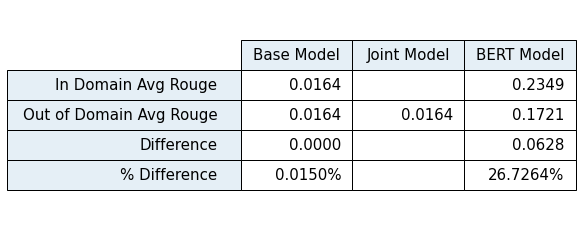

In [ ]:
#@title Rouge1 Scores And Generalization Ability
# produce results
# make sure correct number of results are contained
assert len(in_domain_results["base"]) == 3 and len(in_domain_results["bert"]) == 3
assert len(out_domain_results["joint"]) == 3
assert len(out_domain_results["base"]) == 6 and len(out_domain_results["bert"]) == 6


# REFERENCE https://www.pythonpool.com/matplotlib-table/

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)

def get_percentage_diff(previous, current):
  return abs(previous - current)/max(previous, current) * 100

row_headers = ["In Domain Avg Rouge", "Out of Domain Avg Rouge", "Difference", "% Difference"]
column_headers = ["Base Model", "Joint Model", "BERT Model"]

rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))

cell_text = []
cell_text.append(['%.4f' % mean(in_domain_results["base"]), None, '%.4f' % mean(in_domain_results["bert"])])
cell_text.append(['%.4f' % mean(out_domain_results["base"]), '%.4f' % mean(out_domain_results["joint"]), '%.4f' % mean(out_domain_results["bert"])])
cell_text.append(['%.4f' % abs(mean(in_domain_results["base"])-mean(out_domain_results["base"])), None, '%.4f' % abs(mean(in_domain_results["bert"])-mean(out_domain_results["bert"]))])
cell_text.append(['%.4f' % get_percentage_diff(mean(in_domain_results["base"]), mean(out_domain_results["base"])) + '%', None, '%.4f' % get_percentage_diff(mean(in_domain_results["bert"]), mean(out_domain_results["bert"])) + '%'])

the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center')
the_table.set_fontsize(60)
the_table.scale(1, 2.5)

<!-- |                         | Base Model | Joint Model | BERT Model |
|-------------------------|------------|-------------|------------|
| In Domain Avg Rouge     |            |             |            |
| Out of Domain Avg Rouge |            |             |            |
| Difference              |            |             |            |
| % Difference            |            |             |            | -->

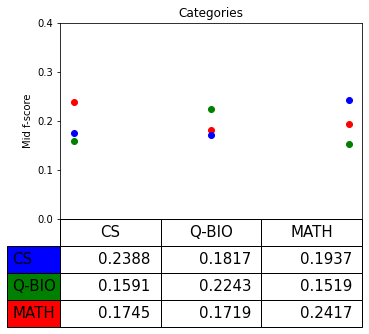

In [ ]:
#@title BERT2BERT ROUGE1 Scores by Category Fine Tuned On
# REFERENCE https://matplotlib.org/3.5.0/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py

columns = ('CS', 'Q-BIO', 'MATH')
rows = [ x for x in ('CS', 'Q-BIO', 'MATH')]

values = np.arange(0.0, 0.5, 0.1)
value_increment = 0.1

# Get some pastel shades for the colors
colors = ['r', 'g', 'b']
n_rows = len(bert2bert_model_f_scores)

index = np.arange(len(columns)) + 0.3

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.plot(index, bert2bert_model_f_scores[row], linestyle = "", marker = "o", markerfacecolor=colors[row], markeredgecolor=colors[row], color=colors[row])
    cell_text.append(['%.4f' % x for x in bert2bert_model_f_scores[row]])
# Reverse colors
colors = colors[::-1]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

the_table.set_fontsize(15)
the_table.scale(1, 2.5)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Mid f-score")
plt.yticks([val for val in values])
plt.xticks([])
plt.title('Categories')

plt.show()

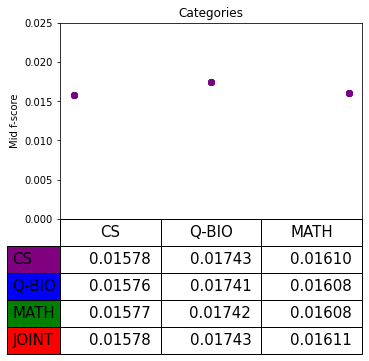

In [ ]:
#@title BASE Model ROUGE1 Scores by Category Trained On
columns = ('CS', 'Q-BIO', 'MATH')
rows = [ x for x in ('CS', 'Q-BIO', 'MATH', 'JOINT')]

values = np.arange(0.0, 0.03, 0.005)
value_increment = 0.1

# Get some pastel shades for the colors
colors = ['r', 'g', 'b', 'purple']
n_rows = len(base_model_f_scores)

index = np.arange(len(columns)) + 0.3

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.plot(index, base_model_f_scores[row], linestyle = "", marker = "o", markerfacecolor=colors[row], markeredgecolor=colors[row], color=colors[row])
    cell_text.append(['%.5f' % x for x in base_model_f_scores[row]])
# Reverse colors
colors = colors[::-1]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

the_table.set_fontsize(15)
the_table.scale(1, 2.5)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Mid f-score")
plt.yticks([ val for val in values])
plt.xticks([])
plt.title('Categories')

plt.show()

#Summary

**By Looking at the predicted titles from Experiment 1, we can see that there is a domain shift issue with research paper categories. Furthermore, a joint training strategy helps the model learn vocabulary from all the domains it is trained on and helps mitigate the domain shift issue from a qualitative perspective by looking at the predicted titles. Finally, the pretrained BERT2BERT Model mitigates domains shift as well along with predicting better titles from a qualitative perspective. This is due to the pretraining had by BERT2BERT and the lack of pretraining for our base models.**

**The base models are having difficulty learning a great representation of predicted titles due to the choice of epochs and 8000 examples for training data due to limited compute power, however qualitatively it is showing domain shift. The lack of spread is evident in the final table above where there is no variance in the data points.**

**Quantitatively, there appears to still be an issue with domain shift in the BERT2BERT Model, as ilustrated with the ROUGE1 Mid Fmeasure Scores. However, the mdoel is still able to produce reasonable titles on data it has not seem during fine tuning due to the pretraining.**